In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings

warnings.simplefilter("ignore")

HIBA len:  1616
ISIC2019 len:  25331
HAM10000 len:  1705
PAD_UFES_20 len:  2298
['dermatofibroma', 'vascular lesion', 'nevus', 'solar lentigo', 'actinic keratosis', 'pigmented benign keratosis', 'lichenoid keratosis', 'seborrheic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']


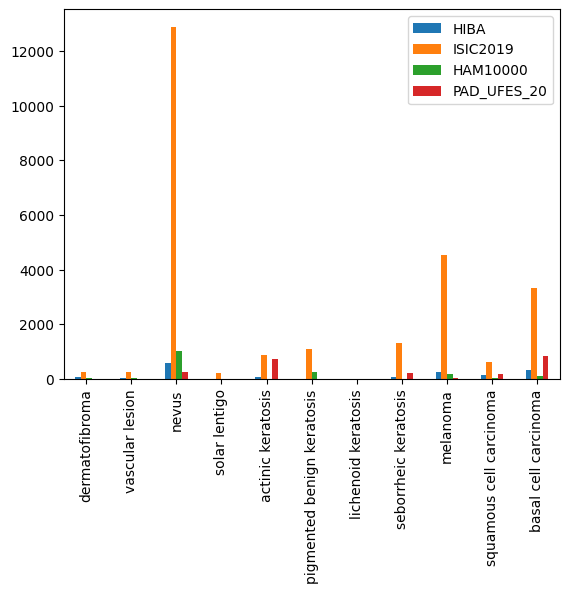

In [2]:
HIBA_DIR = "./datasets/HIBA"
ISIC2019_DIR = "./datasets/ISIC2019"
HAM10000_DIR = "./datasets/HAM10000"
PAD_UFES_20_DIR = "./datasets/PAD-UFES-20"

hiba_df = pd.read_csv(f"{HIBA_DIR}/metadata.csv")
isic2019_df = pd.read_csv(f"{ISIC2019_DIR}/metadata.csv")
ham10000_df = pd.read_csv(f"{HAM10000_DIR}/metadata.csv")
ham10000_df = ham10000_df[:1705]  # remove duplicates from ham10000 that are in isic2019
pad_ufes_20_df = pd.read_csv(f"{PAD_UFES_20_DIR}/metadata.csv")
# change diagnostic to diagnosis
pad_ufes_20_df = pad_ufes_20_df.rename(columns={"diagnostic": "diagnosis"})
pad_ufes_20_df["diagnosis"] = pad_ufes_20_df["diagnosis"].map(
    {
        "BCC": "basal cell carcinoma",
        "SCC": "squamous cell carcinoma",
        "ACK": "actinic keratosis",
        "SEK": "seborrheic keratosis",
        "BOD": "squamous cell carcinoma",  # bowen's disease but considered squamous cell carcinoma
        "MEL": "melanoma",
        "NEV": "nevus",
    }
)

hiba_columns = hiba_df.columns
isic2019_columns = isic2019_df.columns
ham10000_columns = ham10000_df.columns
pad_ufes_20_columns = pad_ufes_20_df.columns

print("HIBA len: ", len(hiba_df))
print("ISIC2019 len: ", len(isic2019_df))
print("HAM10000 len: ", len(ham10000_df))
print("PAD_UFES_20 len: ", len(pad_ufes_20_df))


def unique_labels(df, label_column):
    labels = df[label_column].unique()
    return labels


unique_labels_all = list(
    set(unique_labels(isic2019_df, "diagnosis"))
    | set(unique_labels(ham10000_df, "diagnosis"))
    | set(unique_labels(pad_ufes_20_df, "diagnosis"))
    | set(unique_labels(hiba_df, "diagnosis"))
)

print(unique_labels_all)

num_each_type = {}

for label in unique_labels_all:
    num_each_type[label] = [
        hiba_df[hiba_df["diagnosis"] == label].shape[0],
        isic2019_df[isic2019_df["diagnosis"] == label].shape[0],
        ham10000_df[ham10000_df["diagnosis"] == label].shape[0],
        pad_ufes_20_df[pad_ufes_20_df["diagnosis"] == label].shape[0],
    ]

num_each_type_df = pd.DataFrame(
    num_each_type, index=["HIBA", "ISIC2019", "HAM10000", "PAD_UFES_20"]
)
num_each_type_df = num_each_type_df.T

num_each_type_df.plot(kind="bar")

USED_LABELS = [
    "melanoma",
    "squamous cell carcinoma",
    "basal cell carcinoma",
    "actinic keratosis",
]

In [3]:
def get_image_loc(df, img_dir, img_column, file_extension):
    return df[img_column].apply(lambda x: f"{img_dir}/{x}{file_extension}")


hiba_image_loc = get_image_loc(hiba_df, HIBA_DIR, "isic_id", ".JPG")
isic2019_image_loc = get_image_loc(isic2019_df, ISIC2019_DIR, "isic_id", ".JPG")
ham10000_image_loc = get_image_loc(ham10000_df, HAM10000_DIR, "isic_id", ".JPG")
pad_ufes_20_image_loc = get_image_loc(pad_ufes_20_df, PAD_UFES_20_DIR, "img_id", "")

In [4]:
ham10000_df.loc[~ham10000_df["diagnosis"].isin(USED_LABELS), "diagnosis"] = "others"
isic2019_df.loc[~isic2019_df["diagnosis"].isin(USED_LABELS), "diagnosis"] = "others"
hiba_df.loc[~hiba_df["diagnosis"].isin(USED_LABELS), "diagnosis"] = "others"
pad_ufes_20_df.loc[~pad_ufes_20_df["diagnosis"].isin(USED_LABELS), "diagnosis"] = (
    "others"
)

USED_LABELS.append("others")

In [5]:
def get_label(df, label_column):
    labels = df[label_column]
    return labels


hiba_label = get_label(hiba_df, "diagnosis")
isic2019_label = get_label(isic2019_df, "diagnosis")
ham10000_label = get_label(ham10000_df, "diagnosis")
pad_ufes_20_label = get_label(pad_ufes_20_df, "diagnosis")

In [6]:
# Check for duplicates


def removing_duplicates(a, b, remove):
    a = np.delete(a, remove, axis=0)
    b = np.delete(b, remove, axis=0)

    return a, b


print("Checking for duplicates")
print("HIBA")
hiba_image_loc, hiba_label = removing_duplicates(
    hiba_image_loc, hiba_label, remove=[1098]
)
print("ISIC2019")
isic2019_image_loc, isic2019_label = removing_duplicates(
    isic2019_image_loc,
    isic2019_label,
    remove=[
        12232,
        9121,
        7213,
        7264,
        5141,
        5428,
        11592,
        7705,
        10049,
        8749,
        5837,
        1601,
        12038,
        3452,
        12185,
        6060,
        2674,
        12017,
        6859,
        7150,
        7464,
        8265,
        10395,
        7651,
        3640,
        4197,
        11466,
        8553,
        10184,
        5658,
        4848,
        11066,
        12070,
        6473,
        6266,
        7440,
        6923,
        7631,
        8033,
        11518,
        7953,
        12037,
        9918,
        8959,
        12014,
        11881,
        11609,
        21956,
        22367,
        24078,
    ],
)
print("HAM10000")
ham10000_image_loc, ham10000_label = removing_duplicates(
    ham10000_image_loc, ham10000_label, remove=[]
)
print("PAD_UFES_20")
pad_ufes_20_image_loc, pad_ufes_20_label = removing_duplicates(
    pad_ufes_20_image_loc,
    pad_ufes_20_label,
    remove=[
        16,
        1138,
        18,
        888,
        28,
        1753,
        1357,
        210,
        1919,
        274,
        858,
        476,
        537,
        606,
        2211,
        677,
        1498,
        726,
        1632,
        992,
        1002,
        1850,
        1087,
        1924,
        1982,
        1318,
        1339,
        1997,
        1998,
    ],
)

Checking for duplicates
HIBA
ISIC2019
HAM10000
PAD_UFES_20


In [7]:
from sklearn.model_selection import train_test_split


def split_train_val_test(image_np, label_np, test_size=0.1):
    train_image, test_image, train_label, test_label = train_test_split(
        image_np, label_np, test_size=test_size, stratify=label_np, random_state=3
    )

    train_image, val_image, train_label, val_label = train_test_split(
        train_image, train_label, test_size=test_size / (1-test_size), stratify=train_label, random_state=3
    )

    return (
        train_image,
        val_image,
        test_image,
        train_label,
        val_label,
        test_label,
    )


TEST_SIZE = 0.1

print("Splitting datasets...")
print("HIBA...")

(
    hiba_train_image_loc,
    hiba_val_image_loc,
    hiba_test_image_loc,
    hiba_train_label,
    hiba_val_label,
    hiba_test_label,
) = split_train_val_test(
    hiba_image_loc, hiba_label, test_size=TEST_SIZE
)

del hiba_image_loc
del hiba_label

print("ISIC2019...")

(
    isic2019_train_image_loc,
    isic2019_val_image_loc,
    isic2019_test_image_loc,
    isic2019_train_label,
    isic2019_val_label,
    isic2019_test_label,
) = split_train_val_test(
    isic2019_image_loc, isic2019_label, test_size=TEST_SIZE
)

del isic2019_image_loc
del isic2019_label

print("HAM10000...")

(
    ham10000_train_image_loc,
    ham10000_val_image_loc,
    ham10000_test_image_loc,
    ham10000_train_label,
    ham10000_val_label,
    ham10000_test_label,
) = split_train_val_test(
    ham10000_image_loc, ham10000_label, test_size=TEST_SIZE
)

del ham10000_image_loc
del ham10000_label

print("PAD-UFES-20...")

(
    pad_ufes_20_train_image_loc,
    pad_ufes_20_val_image_loc,
    pad_ufes_20_test_image_loc,
    pad_ufes_20_train_label,
    pad_ufes_20_val_label,
    pad_ufes_20_test_label,
) = split_train_val_test(
    pad_ufes_20_image_loc,
    pad_ufes_20_label,
    test_size=TEST_SIZE,
)

del pad_ufes_20_image_loc
del pad_ufes_20_label

Splitting datasets...
HIBA...
ISIC2019...
HAM10000...
PAD-UFES-20...


In [ ]:
train_image_loc = np.concatenate(
    (
        hiba_train_image_loc,
        isic2019_train_image_loc,
        ham10000_train_image_loc,
        pad_ufes_20_train_image_loc,
    ),
    axis=0,
)
val_image_loc = np.concatenate(
    (
        hiba_val_image_loc,
        isic2019_val_image_loc,
        ham10000_val_image_loc,
        pad_ufes_20_val_image_loc,
    ),
    axis=0,
)

test_image_loc = np.concatenate(
    (
        hiba_test_image_loc,
        isic2019_test_image_loc,
        ham10000_test_image_loc,
        pad_ufes_20_test_image_loc,
    ),
    axis=0,
)

train_label = np.concatenate(
    (
        hiba_train_label,
        isic2019_train_label,
        ham10000_train_label,
        pad_ufes_20_train_label,
    ),
    axis=0,
)

val_label = np.concatenate(
    (
        hiba_val_label,
        isic2019_val_label,
        ham10000_val_label,
        pad_ufes_20_val_label,
    ),
    axis=0,
)

test_label = np.concatenate(
    (
        hiba_test_label,
        isic2019_test_label,
        ham10000_test_label,
        pad_ufes_20_test_label,
    ),
    axis=0,
)

print(train_image_loc.shape)
print(val_image_loc.shape)
print(test_image_loc.shape)

# copy files from train_image_loc, val_image_loc, test_image_loc to train, val, test folder
TRAIN_OUT_DIR = "./out/train"
VAL_OUT_DIR = "./out/val"
TEST_OUT_DIR = "./out/test"
TEST_INDIVIDUAL_OUT_DIR = "./out/individual"

import os
import shutil


def process_images(image_loc, image_label, out_dir):
    # seperate by class too
    os.makedirs(out_dir, exist_ok=True)
    
    for label in USED_LABELS:
        os.makedirs(f"{out_dir}/{label}", exist_ok=True)

    for i, image_loc in enumerate(tqdm(image_loc)):
        label = image_label[i]
        shutil.copy(image_loc, f"{out_dir}/{label}/{i}.{image_loc.split('.')[-1]}")


process_images(train_image_loc, train_label, TRAIN_OUT_DIR)
process_images(val_image_loc, val_label, VAL_OUT_DIR)
process_images(test_image_loc, test_label, TEST_OUT_DIR)
process_images(hiba_test_image_loc, hiba_test_label, TEST_INDIVIDUAL_OUT_DIR + "/hiba")
process_images(isic2019_test_image_loc, isic2019_test_label, TEST_INDIVIDUAL_OUT_DIR + "/isic2019")
process_images(ham10000_test_image_loc, ham10000_test_label, TEST_INDIVIDUAL_OUT_DIR + "/ham10000")
process_images(pad_ufes_20_test_image_loc, pad_ufes_20_test_label, TEST_INDIVIDUAL_OUT_DIR + "/pad_ufes_20")

(24693,)
(3088,)
(3089,)


 78%|███████▊  | 2399/3089 [00:42<00:11, 62.28it/s]

In [ ]:
# increase occurences of specific classes in train set
unique, counts = np.unique(train_label, return_counts=True)
unique_counts = dict(zip(unique, counts))
print(unique_counts)

for label in USED_LABELS:
    num_copies = 4500 // unique_counts[label] - 1

    unique_counts[label] = (num_copies + 1) * unique_counts[label]

    for i in range(num_copies):
        for j, image_loc in enumerate(train_image_loc):
            os.makedirs(f"{TRAIN_OUT_DIR}/{label}/copy{i}", exist_ok=True)
            if train_label[j] == label:
                shutil.copy(
                    image_loc,
                    f"{TRAIN_OUT_DIR}/{label}/copy{i}/{j}.{image_loc.split('.')[-1]}",
                )
print(unique_counts)

In [ ]:
# get total number of images in each category
unqiue, train_counts = np.unique(train_label, return_counts=True)
unique, val_counts = np.unique(val_label, return_counts=True)
unique, test_counts = np.unique(test_label, return_counts=True)

print("Train counts")
print(dict(zip(unique, train_counts)))
print("Val counts")
print(dict(zip(unique, val_counts)))
print("Test counts")
print(dict(zip(unique, test_counts)))
total_counts = train_counts + val_counts + test_counts
print("Total counts")
print(dict(zip(unique, total_counts)))